In [ ]:
"""
  Feature visualization
  author: MP
  date: 4/29/2021
  
  Plot the eye gaze features in open vs. closed classes. 
  
"""

In [1]:
import pickle
import pandas as pd
import numpy as np
from statistics import mean
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [2]:
# load in the normalized type features
handle = open('C:/6120-NLP/project/data/pickles/type_dict.pickle', 'rb')
type_features = pickle.load(handle)
handle.close()

# load in pos dict
handle = open('C:/6120-NLP/project/data/pickles/pos_dict.pickle', 'rb')
pos_dict = pickle.load(handle)
pos_dict.pop('FALSE')
handle.close()

In [3]:
# create data frame so we can see order of features
type_features_df = pd.DataFrame.from_dict(type_features, orient='index',
                                         columns=['WORD_FIXATION_COUNT', 'WORD_FIXATION_%', 'WORD_GAZE_DURATION',
                                                  'WORD_FIRST_FIXATION_DURATION', 'WORD_SECOND_FIXATION_DURATION',
                                                 'WORD_THIRD_FIXATION_DURATION', 'WORD_TOTAL_READING_TIME',
                                                 'WORD_TOTAL_READING_TIME_%', 'WORD_SKIP', 'WORD_SPILLOVER',
                                                 'WORD_RUN_COUNT'])
type_features_df.head()

,WORD_FIXATION_COUNT,WORD_FIXATION_%,WORD_GAZE_DURATION,WORD_FIRST_FIXATION_DURATION,WORD_SECOND_FIXATION_DURATION,WORD_THIRD_FIXATION_DURATION,WORD_TOTAL_READING_TIME,WORD_TOTAL_READING_TIME_%,WORD_SKIP,WORD_SPILLOVER,WORD_RUN_COUNT
<?>,1.342770,0.016443,234.515001,195.610760,68.805549,20.777577,295.407737,0.017278,0.265847,62.975299,1.098240
A,0.308294,0.003967,56.860304,54.688921,5.649932,1.002935,61.341788,0.003761,0.764564,21.397862,0.298284
Abbey,1.071429,0.011907,249.142857,160.785714,90.428571,12.428571,263.642857,0.014486,0.714286,36.857143,0.785714
About,0.959184,0.011497,164.989796,139.244898,46.132653,5.785714,193.826531,0.011092,0.428571,62.928571,0.826531
Above,1.000000,0.010893,152.714286,144.214286,32.142857,7.428571,183.785714,0.009914,0.500000,31.785714,0.857143


In [4]:
# make a dictionary mapping pos --> values for a given feature, when the corresponding word is in said pos class
# first for word fixation count
WORD_FIXATION_COUNT_d = {'VERB': [], 'NOUN': [], 'PRON': [], 'DET':[], 'ADP': [], 'ADV':[], 'CONJ':[],
                        'ADJ':[], 'X': [], 'NUM': [], 'PRT': []}
for key, value in type_features.items():
    pos = pos_dict.get(key, 0)
    try:
        WORD_FIXATION_COUNT_d[pos].append(value[0])
    except:
        pass

# average over all values for this class
for key, value in WORD_FIXATION_COUNT_d.items():
    WORD_FIXATION_COUNT_d[key] = mean(value)

In [5]:
# now for gaze duration
WORD_GAZE_DURATION_d = {'VERB': [], 'NOUN': [], 'PRON': [], 'DET':[], 'ADP': [], 'ADV':[], 'CONJ':[],
                        'ADJ':[], 'X': [], 'NUM': [], 'PRT': []}
for key, value in type_features.items():
    pos = pos_dict.get(key, 0)
    try:
        WORD_GAZE_DURATION_d[pos].append(value[2])
    except:
        pass

# average over all values for this class
for key, value in WORD_GAZE_DURATION_d.items():
    WORD_GAZE_DURATION_d[key] = mean(value)

In [6]:
# now for word skip
WORD_SKIP_d = {'VERB': [], 'NOUN': [], 'PRON': [], 'DET':[], 'ADP': [], 'ADV':[], 'CONJ':[],
                        'ADJ':[], 'X': [], 'NUM': [], 'PRT': []}
for key, value in type_features.items():
    pos = pos_dict.get(key, 0)
    try:
        WORD_SKIP_d[pos].append(value[8])
    except:
        pass

# average over all values for this class
for key, value in WORD_SKIP_d.items():
    WORD_SKIP_d[key] = mean(value)

In [7]:
# now for third fixation duration
WORD_THIRD_FIXATION_DURATION_d = {'VERB': [], 'NOUN': [], 'PRON': [], 'DET':[], 'ADP': [], 'ADV':[], 'CONJ':[],
                        'ADJ':[], 'X': [], 'NUM': [], 'PRT': []}
for key, value in type_features.items():
    pos = pos_dict.get(key, 0)
    try:
        WORD_THIRD_FIXATION_DURATION_d[pos].append(value[5])
    except:
        pass

# average over all values for this class
for key, value in WORD_THIRD_FIXATION_DURATION_d.items():
    WORD_THIRD_FIXATION_DURATION_d[key] = mean(value)

In [8]:
# now for first fixation duration
WORD_FIRST_FIXATION_DURATION_d = {'VERB': [], 'NOUN': [], 'PRON': [], 'DET':[], 'ADP': [], 'ADV':[], 'CONJ':[],
                        'ADJ':[], 'X': [], 'NUM': [], 'PRT': []}
for key, value in type_features.items():
    pos = pos_dict.get(key, 0)
    try:
        WORD_FIRST_FIXATION_DURATION_d[pos].append(value[3])
    except:
        pass

# average over all values for this class
for key, value in WORD_FIRST_FIXATION_DURATION_d.items():
    WORD_FIRST_FIXATION_DURATION_d[key] = mean(value)

In [ ]:
'''
Open classes: ADJ, ADV, INTJ, NOUN, PROP, VERB (gray)
Closed classes: ADP, AUX, CONJ, DET, NUM, PART, PRON (purple)
'''

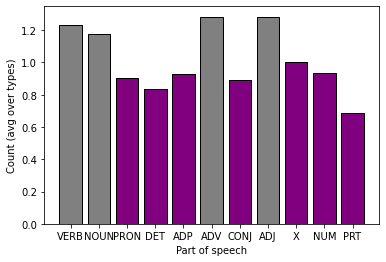

In [9]:
# total fixations on the current word
keys = WORD_FIXATION_COUNT_d.keys()
values = WORD_FIXATION_COUNT_d.values()
plt.bar(keys, values, color=['gray', 'gray', 'purple', 'purple', 'purple', 'gray', 'purple', 
                            'gray', 'purple', 'purple', 'purple'], edgecolor='black')
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 12})
plt.xlabel('Part of speech') 
plt.ylabel('Count (avg over types)') 
plt.savefig('word_fixation_count.png', facecolor='w')
plt.show()

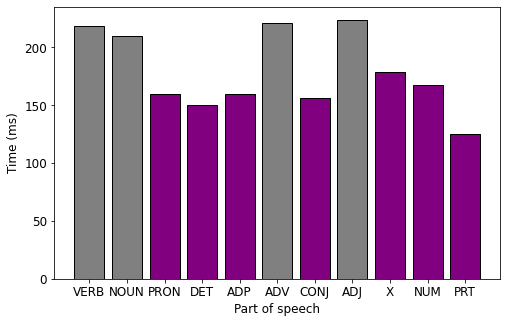

In [11]:
# total fixations on the current word
keys2 = WORD_GAZE_DURATION_d.keys()
values2 = WORD_GAZE_DURATION_d.values()
plt.bar(keys2, values2, color=['gray', 'gray', 'purple', 'purple', 'purple', 'gray', 'purple', 
                            'gray', 'purple', 'purple', 'purple'], edgecolor='black')
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 12})
plt.xlabel('Part of speech') 
plt.ylabel('Time (ms)') 
plt.savefig('word_gaze_duration.png', facecolor='w')
plt.show()

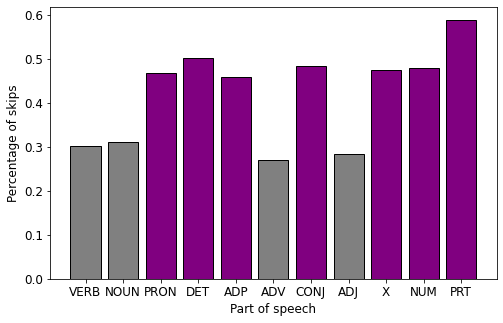

In [12]:
# total fixations on the current word
keys2 = WORD_SKIP_d.keys()
values2 = WORD_SKIP_d.values()
plt.bar(keys2, values2, color=['gray', 'gray', 'purple', 'purple', 'purple', 'gray', 'purple', 
                            'gray', 'purple', 'purple', 'purple'], edgecolor='black')
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 12})
plt.xlabel('Part of speech') 
plt.ylabel('Percentage of skips') 
plt.savefig('word_skip_percent.png', facecolor='w')
plt.show()

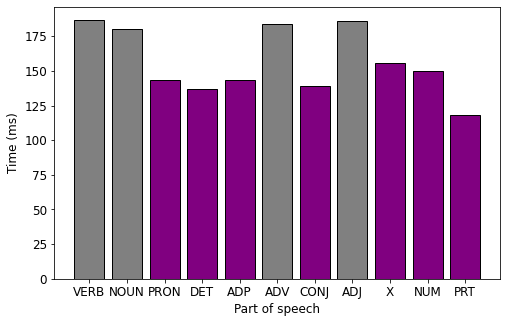

In [13]:
# total fixations on the current word
keys2 = WORD_FIRST_FIXATION_DURATION_d.keys()
values2 = WORD_FIRST_FIXATION_DURATION_d.values()
plt.bar(keys2, values2, color=['gray', 'gray', 'purple', 'purple', 'purple', 'gray', 'purple', 
                            'gray', 'purple', 'purple', 'purple'], edgecolor='black')
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 12})
plt.xlabel('Part of speech') 
plt.ylabel('Time (ms)') 
plt.savefig('word_first_fixation_duration.png', facecolor='w')
plt.show()

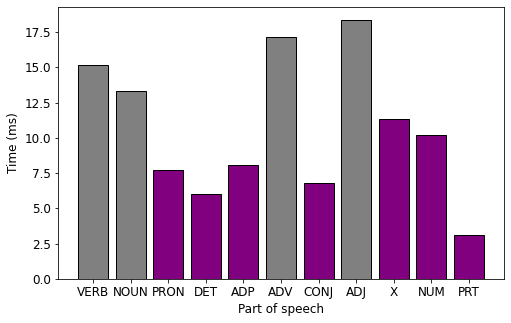

In [14]:
# total fixations on the current word
keys2 = WORD_THIRD_FIXATION_DURATION_d.keys()
values2 = WORD_THIRD_FIXATION_DURATION_d.values()
plt.bar(keys2, values2, color=['gray', 'gray', 'purple', 'purple', 'purple', 'gray', 'purple', 
                            'gray', 'purple', 'purple', 'purple'], edgecolor='black')
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 12})
plt.xlabel('Part of speech') 
plt.ylabel('Time (ms)') 
plt.savefig('word_third_fixation_duration.png', facecolor='w')
plt.show()